### Mass Analysis for 40 analytes
###  Edgar Acuna
#### June 2021

In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [8]:
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)
ys=pd.read_csv("c://onr2020/substrateIDs.csv",header=None)
subs=pd.read_csv("c://onr2020/substrates.csv",header=None)
mass=pd.read_csv("c://onr2020/massLoadings.csv",header=None)
noise=pd.read_csv("c://onr2020/addedNoisePercent.csv",header=None)
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
print('Size of the dataframe: {}'.format(dfset1.shape))

Size of the dataframe: (18000, 1701)


In [9]:
print(np.unique(noise,return_counts=True))

(array([0.  , 0.1 , 0.25, 0.5 , 1.  ]), array([3673, 3562, 3536, 3623, 3606], dtype=int64))


In [10]:
print('Size of the dataframe: {}'.format(subs.shape))

Size of the dataframe: (9, 1701)


In [14]:
dfset2=dfset1.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfset2['MassLoadings']=mass
#crit2=dfset2['MassLoadings']>10
#dfset2=dfset2[crit2]
dfset2.MassLoadings.describe()

count    18000.000000
mean        27.792143
std         13.089361
min          5.014600
25%         16.754250
50%         27.932500
75%         39.310000
max         49.996000
Name: MassLoadings, dtype: float64

### Statistical measures and Histograms  of Mass Loadings for each Analyte

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>],
       [<AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSub

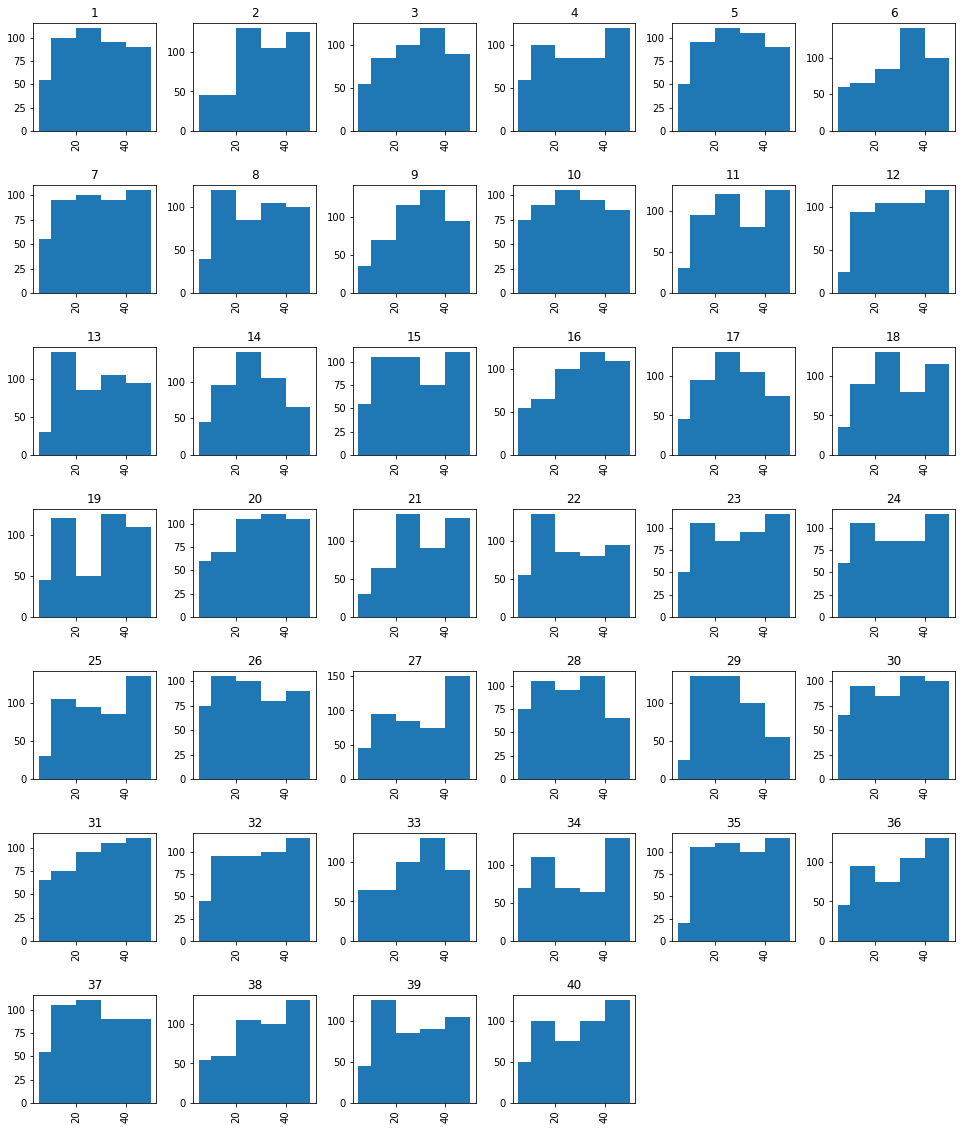

In [6]:
dfset2.MassLoadings.hist(by=dfset2.Analyte,figsize=(16,20), bins=[5,10,20,30,40,50])

In [7]:
dfset2.groupby(["Analyte"])["MassLoadings"].describe()

count       mean        std     min     25%      50%     75%     max
Analyte                                                                      
1        450.0  27.046643  12.955585  5.2343  15.651  26.4995  37.740  49.884
2        450.0  30.195687  12.459824  5.4163  21.426  30.8370  40.654  49.994
3        450.0  27.241640  12.835507  5.3820  17.278  28.6900  39.455  49.209
4        450.0  27.079658  13.863074  5.4502  12.038  25.9815  40.087  49.378
5        450.0  27.272244  12.676028  5.0334  16.944  27.1270  38.704  49.864
6        450.0  28.554343  12.947485  5.5243  16.801  30.7585  39.243  49.857
7        450.0  27.201333  12.811317  5.6028  16.107  27.3110  38.961  49.734
8        450.0  27.215544  12.825592  5.8781  15.855  28.3175  37.465  49.556
9        450.0  28.326056  12.110084  5.0193  20.143  30.3160  38.289  49.448
10       450.0  25.885617  13.118868  5.0543  13.014  26.0815  36.130  49.972
11       450.0  28.977954  12.833376  7.4232  18.349  26.7675  40.785  49.284
12       450.0  29.643267  12.627032  5.0237  19.550  29.9270  40.997  49.614
13       450.0  28.024424  13.334636  5.0927  16.525  28.4675  39.433  49.750
14       450.0  26.126871  12.037153  5.1842  16.746  25.2545  34.592  49.245
15       450.0  26.643984  13.503168  5.1912  14.167  26.8130  39.483  49.576
16       450.0  28.537711  12.672543  5.1160  17.281  30.1005  38.368  49.353
17       450.0  26.430509  12.189143  5.0572  16.776  24.7560  35.848  49.848
18       450.0  28.429697  13.080373  5.0797  18.896  25.8570  40.583  49.083
19       450.0  28.229596  13.618875  5.1924  15.109  30.7550  39.372  49.893
20       450.0  27.984804  12.600007  5.3576  18.678  28.6205  38.034  49.996
21       450.0  30.871714  12.252655  6.7857  20.754  29.7985  41.343  49.870
22       450.0  25.937854  13.464474  5.0481  14.000  22.2995  37.569  49.718
23       450.0  28.009517  13.451268  5.6896  17.432  28.8860  40.566  49.546
24       450.0  27.351609  13.592328  5.5589  16.027  26.2770  40.375  48.915
25       450.0  29.555632  12.912241  5.1077  17.517  29.3230  41.616  49.355
26       450.0  25.324274  12.959018  5.5151  15.603  24.6220  37.187  48.443
27       450.0  29.258818  13.868893  5.2810  17.018  30.0110  42.096  49.880
28       450.0  24.993256  12.798757  5.3631  14.256  23.8070  34.615  49.661
29       450.0  25.739602  11.105265  5.1619  15.318  25.8390  33.841  48.324
30       450.0  27.788001  13.635243  5.0335  14.832  28.3195  38.923  49.848
31       450.0  28.033624  13.763396  5.2259  16.390  28.0735  39.550  49.623
32       450.0  27.973869  13.222128  5.7487  14.484  29.2110  40.138  49.484
33       450.0  28.073952  12.949872  5.7917  17.895  29.1915  38.657  49.232
34       450.0  27.535513  14.775780  5.0743  14.049  24.1840  42.206  49.796
35       450.0  28.685533  12.516627  5.5905  17.535  28.0855  40.193  49.945
36       450.0  29.303871  13.302797  5.2706  18.079  31.0930  41.176  49.682
37       450.0  26.318231  13.188015  5.0339  13.932  24.9315  35.567  49.841
38       450.0  29.480046  13.267200  5.0146  19.868  30.0555  40.375  49.550
39       450.0  27.254708  13.114723  5.0713  16.040  26.1985  39.595  49.938
40       450.0  29.148520  13.560875  6.2944  15.829  29.9370  41.828  49.513

#### There is not much difference between the distribution of the analytes

In [8]:
a=dfset2.groupby(["Analyte"])["MassLoadings"].describe()
a.head()

count       mean        std     min     25%      50%     75%     max
Analyte                                                                      
1        450.0  27.046643  12.955585  5.2343  15.651  26.4995  37.740  49.884
2        450.0  30.195687  12.459824  5.4163  21.426  30.8370  40.654  49.994
3        450.0  27.241640  12.835507  5.3820  17.278  28.6900  39.455  49.209
4        450.0  27.079658  13.863074  5.4502  12.038  25.9815  40.087  49.378
5        450.0  27.272244  12.676028  5.0334  16.944  27.1270  38.704  49.864

In [10]:
a['SNR']=a['mean']/a['std']
a

count       mean        std     min     25%      50%     75%     max  \
Analyte                                                                         
1        450.0  27.046643  12.955585  5.2343  15.651  26.4995  37.740  49.884   
2        450.0  30.195687  12.459824  5.4163  21.426  30.8370  40.654  49.994   
3        450.0  27.241640  12.835507  5.3820  17.278  28.6900  39.455  49.209   
4        450.0  27.079658  13.863074  5.4502  12.038  25.9815  40.087  49.378   
5        450.0  27.272244  12.676028  5.0334  16.944  27.1270  38.704  49.864   
6        450.0  28.554343  12.947485  5.5243  16.801  30.7585  39.243  49.857   
7        450.0  27.201333  12.811317  5.6028  16.107  27.3110  38.961  49.734   
8        450.0  27.215544  12.825592  5.8781  15.855  28.3175  37.465  49.556   
9        450.0  28.326056  12.110084  5.0193  20.143  30.3160  38.289  49.448   
10       450.0  25.885617  13.118868  5.0543  13.014  26.0815  36.130  49.972   
11       450.0  28.977954  12.833376  7.4232  18.349  26.7675  40.785  49.284   
12       450.0  29.643267  12.627032  5.0237  19.550  29.9270  40.997  49.614   
13       450.0  28.024424  13.334636  5.0927  16.525  28.4675  39.433  49.750   
14       450.0  26.126871  12.037153  5.1842  16.746  25.2545  34.592  49.245   
15       450.0  26.643984  13.503168  5.1912  14.167  26.8130  39.483  49.576   
16       450.0  28.537711  12.672543  5.1160  17.281  30.1005  38.368  49.353   
17       450.0  26.430509  12.189143  5.0572  16.776  24.7560  35.848  49.848   
18       450.0  28.429697  13.080373  5.0797  18.896  25.8570  40.583  49.083   
19       450.0  28.229596  13.618875  5.1924  15.109  30.7550  39.372  49.893   
20       450.0  27.984804  12.600007  5.3576  18.678  28.6205  38.034  49.996   
21       450.0  30.871714  12.252655  6.7857  20.754  29.7985  41.343  49.870   
22       450.0  25.937854  13.464474  5.0481  14.000  22.2995  37.569  49.718   
23       450.0  28.009517  13.451268  5.6896  17.432  28.8860  40.566  49.546   
24       450.0  27.351609  13.592328  5.5589  16.027  26.2770  40.375  48.915   
25       450.0  29.555632  12.912241  5.1077  17.517  29.3230  41.616  49.355   
26       450.0  25.324274  12.959018  5.5151  15.603  24.6220  37.187  48.443   
27       450.0  29.258818  13.868893  5.2810  17.018  30.0110  42.096  49.880   
28       450.0  24.993256  12.798757  5.3631  14.256  23.8070  34.615  49.661   
29       450.0  25.739602  11.105265  5.1619  15.318  25.8390  33.841  48.324   
30       450.0  27.788001  13.635243  5.0335  14.832  28.3195  38.923  49.848   
31       450.0  28.033624  13.763396  5.2259  16.390  28.0735  39.550  49.623   
32       450.0  27.973869  13.222128  5.7487  14.484  29.2110  40.138  49.484   
33       450.0  28.073952  12.949872  5.7917  17.895  29.1915  38.657  49.232   
34       450.0  27.535513  14.775780  5.0743  14.049  24.1840  42.206  49.796   
35       450.0  28.685533  12.516627  5.5905  17.535  28.0855  40.193  49.945   
36       450.0  29.303871  13.302797  5.2706  18.079  31.0930  41.176  49.682   
37       450.0  26.318231  13.188015  5.0339  13.932  24.9315  35.567  49.841   
38       450.0  29.480046  13.267200  5.0146  19.868  30.0555  40.375  49.550   
39       450.0  27.254708  13.114723  5.0713  16.040  26.1985  39.595  49.938   
40       450.0  29.148520  13.560875  6.2944  15.829  29.9370  41.828  49.513   

              snr       SNR  
Analyte                      
1        2.087644  2.087644  
2        2.423444  2.423444  
3        2.122366  2.122366  
4        1.953366  1.953366  
5        2.151482  2.151482  
6        2.205397  2.205397  
7        2.123227  2.123227  
8        2.121972  2.121972  
9        2.339047  2.339047  
10       1.973159  1.973159  
11       2.258015  2.258015  
12       2.347604  2.347604  
13       2.101627  2.101627  
14       2.170519  2.170519  
15       1.973165  1.973165  
16       2.251933  2.251933  
17       2.168365  2.168365  
18       2.173462  2.173462  
19    

In [11]:
a.describe()

count       mean        std        min        25%        50%  \
count   40.0  40.000000  40.000000  40.000000  40.000000  40.000000   
mean   450.0  27.792143  13.020031   5.399335  16.604800  27.734537   
std      0.0   1.355434   0.629973   0.495960   2.109985   2.256797   
min    450.0  24.993256  11.105265   5.014600  12.038000  22.299500   
25%    450.0  27.071404  12.675156   5.073550  15.265750  26.056500   
50%    450.0  27.979337  12.957301   5.230100  16.635500  28.201500   
75%    450.0  28.587141  13.454569   5.532950  17.625000  29.830625   
max    450.0  30.871714  14.775780   7.423200  21.426000  31.093000   

             75%        max        snr        SNR  
count  40.000000  40.000000  40.000000  40.000000  
mean   39.040975  49.567550   2.139135   2.139135  
std     2.121043   0.386307   0.142724   0.142724  
min    33.841000  48.324000   1.863557   1.863557  
25%    37.960500  49.372250   2.037672   2.037672  
50%    39.444000  49.642000   2.122796   2.122796  
75%    40.570250  49.858750   2.221267   2.221267  
max    42.206000  49.996000   2.519594   2.519594

### Removing the substrate effect

In [70]:
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]

In [71]:
dfsub1.head(7)

0         1         2         3         4         5         6  \
4   0.022387  0.022508  0.022091  0.023054  0.023010  0.022740  0.023889   
5   0.016367  0.025500  0.021789  0.021186  0.020799  0.020291  0.023251   
8   0.014513  0.033718  0.030902  0.021875  0.020050  0.022401  0.000959   
28  0.019014  0.018980  0.018913  0.018834  0.018755  0.018687  0.018640   
46  0.017785  0.018747  0.019661  0.020427  0.019892  0.020054  0.018121   
48  0.027184  0.025470  0.026716  0.027086  0.026306  0.025131  0.026762   
60  0.015446  0.015041  0.014750  0.014772  0.015061  0.015508  0.016447   

           7         8         9  ...      1694      1695      1696      1697  \
4   0.023936  0.023464  0.024810  ...  0.022298  0.023536  0.025714  0.025306   
5   0.023590  0.021309  0.024121  ...  0.027326  0.025163  0.025810  0.028483   
8   0.020182  0.019640  0.020317  ...  0.016092  0.032118  0.027212  0.022861   
28  0.018611  0.018572  0.018512  ...  0.019040  0.019012  0.018988  0.018965   
46  0.018920  0.019429  0.019454  ...  0.019550  0.020251  0.019480  0.020524   
48  0.025484  0.025934  0.024327  ...  0.036369  0.037329  0.036102  0.037689   
60  0.017075  0.017380  0.017459  ...  0.019318  0.019324  0.019300  0.019267   

        1698      1699      1700  Analyte  substrate  MassLoadings  
4   0.025062  0.023609  0.023901       30          1        32.488  
5   0.028229  0.023216  0.027765       20          1        23.202  
8   0.040566  0.038721  0.029875       39          1        22.911  
28  0.018946  0.018929  0.018900        6          1        15.496  
46  0.019137  0.019782  0.019164        6          1        17.729  
48  0.038054  0.035845  0.037684       18          1        49.083  
60  0.019222  0.019299  0.020895       26          1        15.764  

[7 rows x 1704 columns]

### 1- CENTERING

In [72]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [73]:
print(type(subs))
subs

<class 'pandas.core.frame.DataFrame'>


0         1         2         3         4         5         6     \
0  0.008192  0.008116  0.008042  0.007970  0.007899  0.007830  0.007763   
1  0.035105  0.035617  0.036458  0.037003  0.037084  0.036102  0.035552   
2  0.585620  0.585670  0.585180  0.584100  0.585760  0.587580  0.588340   
3  0.026414  0.026214  0.026014  0.025770  0.025449  0.025250  0.025171   
4  0.011060  0.011381  0.011618  0.011406  0.010922  0.010713  0.010692   
5  0.064400  0.064528  0.064613  0.064131  0.063398  0.062792  0.062214   
6  0.035515  0.035251  0.034737  0.034093  0.033518  0.033043  0.032536   
7  0.031312  0.031438  0.031556  0.031777  0.031780  0.031608  0.031588   
8  0.000880  0.001132  0.004165  0.006112  0.005633  0.004667  0.003701   

       7         8         9     ...      1691      1692      1693      1694  \
0  0.007697  0.007633  0.007570  ...  0.010966  0.010943  0.010919  0.010895   
1  0.035033  0.034687  0.034424  ...  0.040834  0.040778  0.040760  0.040794   
2  0.589410  0.590640  0.591680  ...  0.559620  0.559570  0.559520  0.559470   
3  0.025119  0.025165  0.025351  ...  0.546920  0.547220  0.547540  0.547910   
4  0.010628  0.010722  0.010908  ...  0.023413  0.023356  0.023243  0.023115   
5  0.061542  0.060586  0.059307  ...  0.277670  0.277010  0.276350  0.275670   
6  0.032043  0.031658  0.031341  ...  0.253510  0.252790  0.252040  0.251230   
7  0.031441  0.031011  0.030551  ...  0.569970  0.570000  0.570020  0.570030   
8  0.002964  0.002877  0.002152  ...  0.010077  0.010496  0.010808  0.010552   

       1695      1696      1697      1698      1699      1700  
0  0.010870  0.010845  0.010818  0.010792  0.010765  0.010737  
1  0.040865  0.040946  0.041008  0.041036  0.041051  0.041070  
2  0.559430  0.559380  0.559340  0.559300  0.559260  0.559230  
3  0.548300  0.548650  0.548970  0.549230  0.549390  0.549480  
4  0.023055  0.023158  0.023328  0.023359  0.023251  0.023180  
5  0.274980  0.274300  0.273610  0.272940  0.272330  0.271670  
6  0.250390  0.249560  0.248700  0.247780  0.246860  0.245960  
7  0.570000  0.569940  0.569880  0.569880  0.569930  0.569970  
8  0.010001  0.009687  0.009309  0.008746  0.008464  0.008364  

[9 rows x 1701 columns]

In [74]:
y1=subs.loc[0,:]
y2=subs.loc[1,:]
y3=subs.loc[2,:]
y4=subs.loc[3,:]
y5=subs.loc[4,:]
y6=subs.loc[5,:]
y7=subs.loc[6,:]
y8=subs.loc[7,:]
y9=subs.loc[8,:]

In [75]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(y1))/np.sum(np.array(y1)*np.array(y1)))*y1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(y2))/np.sum(np.array(y2)*np.array(y2)))*y2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(y3))/np.sum(np.array(y3)*np.array(y3)))*y3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(y4))/np.sum(np.array(y4)*np.array(y4)))*y4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(y5))/np.sum(np.array(y5)*np.array(y5)))*y5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(y6))/np.sum(np.array(y6)*np.array(y6)))*y6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(y7))/np.sum(np.array(y7)*np.array(y7)))*y7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(y8))/np.sum(np.array(y8)*np.array(y8)))*y8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(y9))/np.sum(np.array(y9)*np.array(y9)))*y9,axis=1)

In [76]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

0         1         2         3         4         5         6     \
4   0.002296  0.002603  0.002368  0.003507  0.003637  0.003537  0.004850   
5  -0.005471  0.003865  0.000351 -0.000060 -0.000258 -0.000582  0.002557   
8  -0.002496  0.016867  0.014204  0.005327  0.003649  0.006143 -0.015160   
28  0.001313  0.001443  0.001536  0.001612  0.001687  0.001768  0.001866   
46 -0.001097  0.000040  0.001125  0.002056  0.001685  0.002006  0.000228   

        7         8         9     ...      1691      1692      1693      1694  \
4   0.005059  0.004744  0.006244  ... -0.001858 -0.002531 -0.002143 -0.004422   
5   0.003072  0.000961  0.003941  ... -0.004245 -0.001915 -0.005149 -0.001717   
8   0.004201  0.003791  0.004599  ...  0.002574 -0.018040 -0.018488 -0.006529   
28  0.001979  0.002079  0.002155  ... -0.004576 -0.004550 -0.004524 -0.004502   
46  0.001179  0.001835  0.002005  ... -0.004655 -0.006438 -0.005102 -0.005563   

        1695      1696      1697      1698      1699      1700  
4  -0.003123 -0.000884 -0.001225 -0.001406 -0.002792 -0.002432  
5  -0.003814 -0.003100 -0.000355 -0.000540 -0.005481 -0.000857  
8   0.009548  0.004694  0.000399  0.018158  0.016369  0.007582  
28 -0.004476 -0.004446 -0.004411 -0.004373 -0.004332 -0.004301  
46 -0.004804 -0.005517 -0.004411 -0.005738 -0.005031 -0.005584  

[5 rows x 1701 columns]

In [77]:
from sklearn.decomposition import PCA
#Computing up to first 3 PC
pca = PCA(n_components=3)
pca_result = pca.fit_transform(cent_subs.iloc[:,0:1071])
#pca_result = pca.fit_transform(hard_subs.iloc[:,0:1701])
cent_subs['pca-one'] = pca_result[:,0]
cent_subs['pca-two'] = pca_result[:,1] 
cent_subs['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation by the 3PCs: {}'.format(pca.explained_variance_ratio_.cumsum()))

Explained variation per principal component: [0.62632493 0.18223194 0.08168612]
Cumulative explained variation by the 3PCs: [0.62632493 0.80855687 0.890243  ]


In [78]:
ys

0
0      2
1      3
2      7
3      7
4      1
...   ..
17995  9
17996  5
17997  3
17998  8
17999  9

[18000 rows x 1 columns]

In [79]:
cent_subs['substrate']=ys
cent_subs.tail()

0         1         2         3         4         5         6  \
17958  0.015555  0.014580 -0.002140 -0.010120 -0.009431 -0.003715 -0.000080   
17960  0.274955  0.257090  0.128671  0.054665  0.058964  0.070314  0.077914   
17968  0.186437  0.156788 -0.041213 -0.148692 -0.095673 -0.007472  0.106668   
17995  0.127213  0.122522  0.068188  0.030374  0.040587  0.056976  0.076275   
17999  0.064695  0.058038 -0.013239 -0.059357 -0.048996 -0.027135 -0.005242   

              7         8         9  ...      1695      1696      1697  \
17958  0.004816  0.002794  0.006567  ... -0.013280 -0.013273 -0.009969   
17960  0.074858  0.065335  0.051588  ... -0.124998 -0.121728 -0.106000   
17968  0.184080  0.206781  0.256556  ... -0.236882 -0.217190 -0.194266   
17995  0.090703  0.090344  0.107973  ... -0.053910 -0.047576 -0.039941   
17999  0.011585  0.013273  0.029986  ... -0.057828 -0.050599 -0.042200   

           1698      1699      1700   pca-one   pca-two  pca-three  substrate  
17958 -0.007261 -0.007224 -0.006824 -0.356049  0.106069  -0.203738          9  
17960 -0.082260 -0.066654 -0.065265  2.323248  1.439384   0.059458          9  
17968 -0.159667 -0.138361 -0.087278  3.090985  3.176042  -0.117857          9  
17995 -0.029604 -0.025971 -0.023102  1.042988  0.385365   0.083181          9  
17999 -0.029844 -0.023319 -0.015499  0.971551  0.944446  -0.193541          9  

[5 rows x 1705 columns]

### PCA 2D Visualization afer centering

In [80]:
from sklearn.decomposition import PCA
#Computing up to first 3 PC
pca = PCA(n_components=3)
pca_result = pca.fit_transform(cent_subs.iloc[:,0:1071])
#pca_result = pca.fit_transform(hard_subs.iloc[:,0:1701])
cent_subs['pca-one'] = pca_result[:,0]
cent_subs['pca-two'] = pca_result[:,1] 
cent_subs['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation by the 3PCs: {}'.format(pca.explained_variance_ratio_.cumsum()))

Explained variation per principal component: [0.62632493 0.18223194 0.08168612]
Cumulative explained variation by the 3PCs: [0.62632493 0.80855687 0.890243  ]


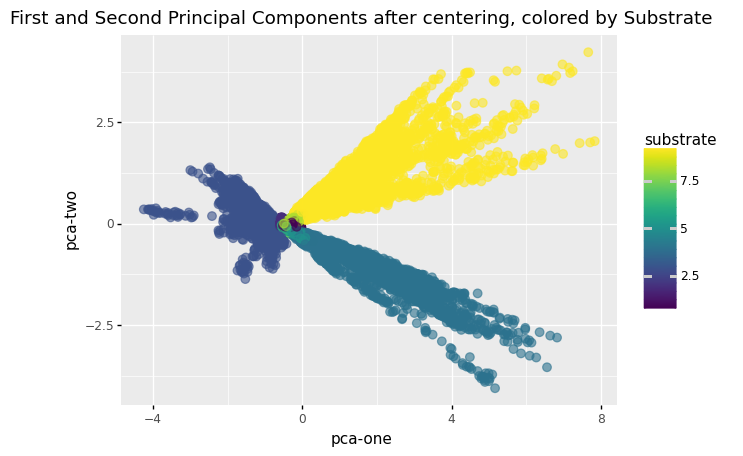

<ggplot: (140273131346)>

In [81]:
rndperm = np.random.permutation(dfset1.shape[0])
from plotnine import *
chart = ggplot(cent_subs.loc[rndperm[:18000],:], aes(x='pca-one', y='pca-two', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("First and Second Principal Components after centering, colored by Substrate")
chart

###  t-SNE 2D visualization  after centering

In [82]:
import time

from sklearn.manifold import TSNE

n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=300)
tsne_results = tsne.fit_transform(cent_subs.iloc[rndperm[:n_sne],0:1701])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.021s...
[t-SNE] Computed neighbors for 10000 samples in 3.769s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.050622
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.656967
[t-SNE] KL divergence after 300 iterations: 2.379843
t-SNE done! Time elapsed:

In [83]:
df_tsne = cent_subs.iloc[rndperm[:n_sne],0:1706].copy()
print(df_tsne.shape)
print(tsne_results.shape)

(10000, 1705)
(10000, 2)


In [84]:
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
#df_tsne['z-tsne'] = tsne_results[:,2]

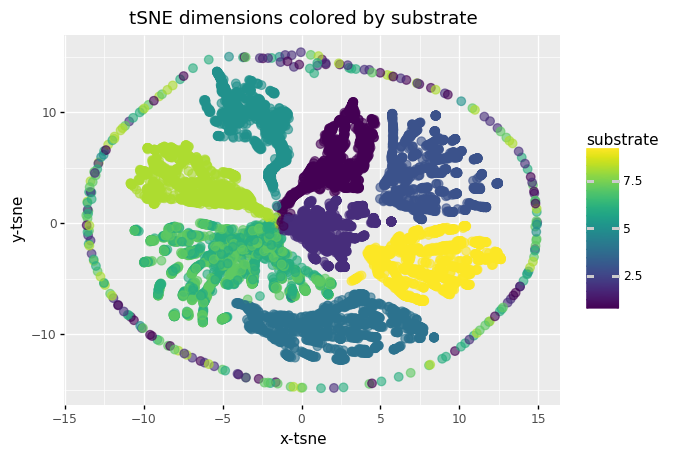

<ggplot: (140272524322)>

In [85]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("tSNE dimensions colored by substrate")
chart

### PCA 3D visualization after centering

In [86]:
cent_subs.loc[rndperm,:].head()

0         1         2         3         4         5         6  \
11996 -0.006380 -0.004417 -0.009008 -0.001453 -0.006473 -0.005097 -0.009190   
16592  0.018054  0.009343  0.014060  0.003955  0.003079  0.007148  0.010149   
6338   0.008591  0.008586  0.008567  0.008532  0.008504  0.008522  0.008538   
12729  0.005470  0.002664  0.001088  0.002792  0.003061  0.002624  0.006723   
715    0.267190  0.263716  0.262372  0.258796  0.254317  0.250641  0.251082   

              7         8         9  ...      1695      1696      1697  \
11996 -0.004205 -0.008318 -0.004726  ... -0.000651  0.001807  0.006414   
16592  0.008658  0.007042  0.009496  ...  0.008415 -0.002157 -0.007354   
6338   0.008560  0.008582  0.008577  ... -0.002646 -0.002646 -0.002645   
12729  0.008338  0.006845  0.005849  ... -0.002753 -0.001590 -0.002046   
715    0.248514  0.245762  0.240601  ... -0.168730 -0.169833 -0.170802   

           1698      1699      1700   pca-one   pca-two  pca-three  substrate  
11996  0.004346 -0.006048  0.005318 -0.583402  0.109195  -0.125763          2  
16592 -0.013411 -0.013726 -0.007689 -0.332418 -0.147541  -0.252566          5  
6338  -0.002645 -0.002646 -0.002626 -0.375393  0.022093  -0.172761          8  
12729  0.000238 -0.002487  0.003771 -0.467481 -0.064725  -0.176937          5  
715   -0.167514 -0.168709 -0.168039  2.138297 -1.231632   0.226533          4  

[5 rows x 1705 columns]

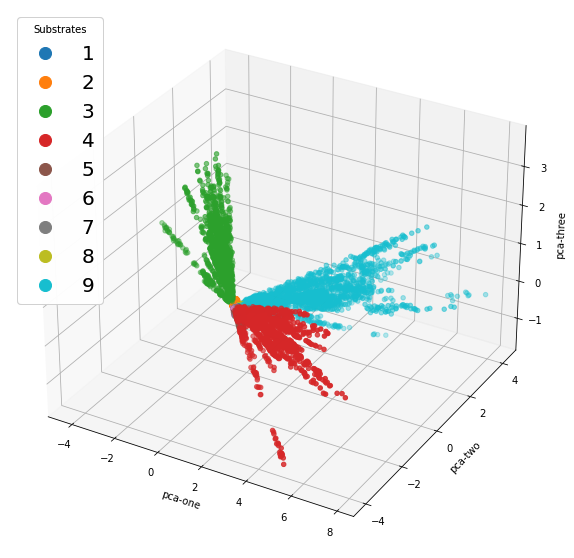

In [87]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter=ax.scatter(
    xs=cent_subs.loc[rndperm,:]["pca-one"], 
    ys=cent_subs.loc[rndperm,:]["pca-two"], 
    zs=cent_subs.loc[rndperm,:]["pca-three"], 
    c=cent_subs.loc[rndperm,:]["substrate"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()

In [88]:
import plotly.express as px
fig=px.scatter_3d(cent_subs, x="pca-one", y="pca-two", z="pca-three",color='substrate')
fig.show()

### t-SNE 3D visualization after centering

In [89]:
import time
from sklearn.manifold import TSNE
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=35, n_iter=300)
tsne_results = tsne.fit_transform(cent_subs.iloc[rndperm[:n_sne],0:1701])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.022s...
[t-SNE] Computed neighbors for 10000 samples in 3.741s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.050622
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.657890
[t-SNE] KL divergence after 300 iterations: 2.109900
t-SNE done! Time elapsed:

In [90]:
#f_tsne = None
df_tsne1 = cent_subs.iloc[rndperm[:n_sne],:].copy()
df_tsne1['x-tsne'] = tsne_results[:,0]
df_tsne1['y-tsne'] = tsne_results[:,1]
df_tsne1['z-tsne'] = tsne_results[:,2]
df_tsne1.head()
df_tsne1.shape

(10000, 1708)

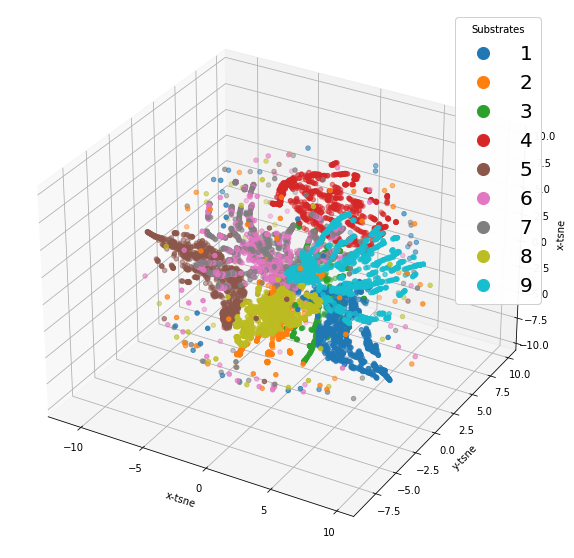

In [91]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter=ax.scatter(
    xs=df_tsne1["x-tsne"], 
    ys=df_tsne1['y-tsne'], 
    zs=df_tsne1["z-tsne"], 
    c=df_tsne1["substrate"], 
    cmap='tab10')
ax.set_xlabel('x-tsne')
ax.set_ylabel('y-tsne')
ax.set_zlabel('x-tsne')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()

In [92]:
import plotly.express as px
fig=px.scatter_3d(df_tsne1, x="x-tsne", y="y-tsne", z="z-tsne",color='substrate',width=1000, height=1000)
fig.show()

### CENTERING AND NORMALIZATION

In [93]:
# Using sklearn
from sklearn.preprocessing import normalize
b=cent_subs.iloc[:,0:1701]
b.head()

0         1         2         3         4         5         6     \
4   0.002296  0.002603  0.002368  0.003507  0.003637  0.003537  0.004850   
5  -0.005471  0.003865  0.000351 -0.000060 -0.000258 -0.000582  0.002557   
8  -0.002496  0.016867  0.014204  0.005327  0.003649  0.006143 -0.015160   
28  0.001313  0.001443  0.001536  0.001612  0.001687  0.001768  0.001866   
46 -0.001097  0.000040  0.001125  0.002056  0.001685  0.002006  0.000228   

        7         8         9     ...      1691      1692      1693      1694  \
4   0.005059  0.004744  0.006244  ... -0.001858 -0.002531 -0.002143 -0.004422   
5   0.003072  0.000961  0.003941  ... -0.004245 -0.001915 -0.005149 -0.001717   
8   0.004201  0.003791  0.004599  ...  0.002574 -0.018040 -0.018488 -0.006529   
28  0.001979  0.002079  0.002155  ... -0.004576 -0.004550 -0.004524 -0.004502   
46  0.001179  0.001835  0.002005  ... -0.004655 -0.006438 -0.005102 -0.005563   

        1695      1696      1697      1698      1699      1700  
4  -0.003123 -0.000884 -0.001225 -0.001406 -0.002792 -0.002432  
5  -0.003814 -0.003100 -0.000355 -0.000540 -0.005481 -0.000857  
8   0.009548  0.004694  0.000399  0.018158  0.016369  0.007582  
28 -0.004476 -0.004446 -0.004411 -0.004373 -0.004332 -0.004301  
46 -0.004804 -0.005517 -0.004411 -0.005738 -0.005031 -0.005584  

[5 rows x 1701 columns]

In [94]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

0         1         2         3         4         5         6     \
4   0.006593  0.007476  0.006800  0.010072  0.010446  0.010157  0.013928   
5  -0.016333  0.011538  0.001048 -0.000179 -0.000770 -0.001737  0.007633   
8  -0.005348  0.036134  0.030431  0.011412  0.007818  0.013162 -0.032478   
28  0.004714  0.005182  0.005515  0.005790  0.006058  0.006349  0.006700   
46 -0.003245  0.000118  0.003326  0.006083  0.004984  0.005934  0.000673   

        7         8         9     ...      1691      1692      1693      1694  \
4   0.014528  0.013623  0.017932  ... -0.005337 -0.007268 -0.006155 -0.012700   
5   0.009170  0.002870  0.011766  ... -0.012672 -0.005718 -0.015373 -0.005127   
8   0.008999  0.008123  0.009853  ...  0.005515 -0.038647 -0.039608 -0.013988   
28  0.007108  0.007465  0.007738  ... -0.016436 -0.016340 -0.016247 -0.016168   
46  0.003487  0.005428  0.005932  ... -0.013769 -0.019043 -0.015090 -0.016453   

        1695      1696      1697      1698      1699      1700  
4  -0.008968 -0.002538 -0.003519 -0.004037 -0.008019 -0.006984  
5  -0.011386 -0.009255 -0.001060 -0.001612 -0.016363 -0.002559  
8   0.020456  0.010057  0.000856  0.038902  0.035069  0.016243  
28 -0.016075 -0.015967 -0.015840 -0.015707 -0.015558 -0.015445  
46 -0.014209 -0.016319 -0.013047 -0.016972 -0.014881 -0.016518  

[5 rows x 1701 columns]

### PCA 2D visualization after  centering and normalization

In [95]:
from sklearn.decomposition import PCA
#Computing up to first 3 PC
pca = PCA(n_components=200)
#pca_result = pca.fit_transform(dfset1)
pca_result = pca.fit_transform(b1.iloc[:,0:1701])
b1['pca-one'] = pca_result[:,0]
b1['pca-two'] = pca_result[:,1]
b1['pca-three'] = pca_result[:,2]
#dfset1['pca-one'] = pca_result[:,0]
#dfset1['pca-two'] = pca_result[:,1] 
#dfset1['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation by the 3PCs: {}'.format(pca.explained_variance_ratio_.cumsum()))

Explained variation per principal component: [0.23746738 0.17600502 0.10165282 0.04330936 0.02902907 0.02403727
 0.01675322 0.01238405 0.01029907 0.00940324 0.00827015 0.0071874
 0.00604938 0.00532795 0.00404727 0.00339781 0.00330363 0.00281004
 0.00237749 0.00213787 0.00205804 0.00181888 0.00167735 0.0015282
 0.00139474 0.00130981 0.00118    0.0011348  0.00106183 0.00103099
 0.0009541  0.00088156 0.00087862 0.00076231 0.0007209  0.0006301
 0.00058122 0.00056908 0.00054732 0.00050995 0.00048035 0.00046686
 0.00045232 0.00043288 0.00041828 0.00040903 0.00040025 0.00039744
 0.00039395 0.00038716 0.00038084 0.00037644 0.00037498 0.0003721
 0.00037144 0.00036891 0.00036696 0.00036537 0.00036423 0.00036312
 0.00036064 0.00036021 0.00035865 0.00035769 0.00035735 0.00035573
 0.0003553  0.00035491 0.0003537  0.00035244 0.00035164 0.00035124
 0.00035005 0.00034943 0.00034892 0.00034788 0.00034723 0.00034619
 0.00034565 0.00034458 0.00034355 0.00034216 0.00034094 0.00034018
 0.00033968 0.0003389

In [32]:
b1['substrate']=ys
b1.tail()

0         1         2         3         4         5         6  \
17958  0.045034  0.042211 -0.006197 -0.029298 -0.027304 -0.010757 -0.000231   
17960  0.073121  0.068370  0.034218  0.014538  0.015681  0.018699  0.020720   
17968  0.032636  0.027446 -0.007214 -0.026029 -0.016748 -0.001308  0.018672   
17995  0.067846  0.065345  0.036367  0.016199  0.021646  0.030387  0.040680   
17999  0.032018  0.028723 -0.006552 -0.029376 -0.024248 -0.013429 -0.002594   

              7         8         9  ...      1695      1696      1697  \
17958  0.013942  0.008088  0.019011  ... -0.038447 -0.038427 -0.028862   
17960  0.019908  0.017375  0.013719  ... -0.033242 -0.032372 -0.028189   
17968  0.032223  0.036197  0.044910  ... -0.041466 -0.038019 -0.034007   
17995  0.048375  0.048183  0.057585  ... -0.028752 -0.025374 -0.021302   
17999  0.005734  0.006569  0.014840  ... -0.028620 -0.025042 -0.020885   

           1698      1699      1700   pca-one   pca-two  pca-three  substrate  
17958 -0.021021 -0.020915 -0.019757 -0.417235  0.050940  -0.373185          9  
17960 -0.021876 -0.017726 -0.017356 -0.361431 -0.171511  -0.395012          9  
17968 -0.027950 -0.024220 -0.015278 -0.326680 -0.147651  -0.495322          9  
17995 -0.015789 -0.013851 -0.012321 -0.409762 -0.232410  -0.312116          9  
17999 -0.014770 -0.011541 -0.007670 -0.311232 -0.324708  -0.428934          9  

[5 rows x 1705 columns]

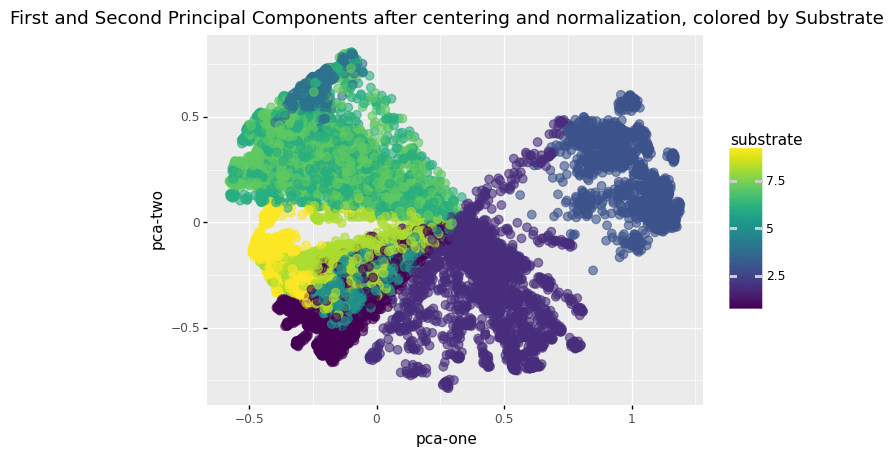

<ggplot: (140270337576)>

In [52]:
rndperm = np.random.permutation(dfset1.shape[0])
from plotnine import *
chart = ggplot(b1.loc[rndperm[:18000],:], aes(x='pca-one', y='pca-two', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("First and Second Principal Components after centering and normalization, colored by Substrate")
chart

###  PCA 3D visualization after  centering and normalization

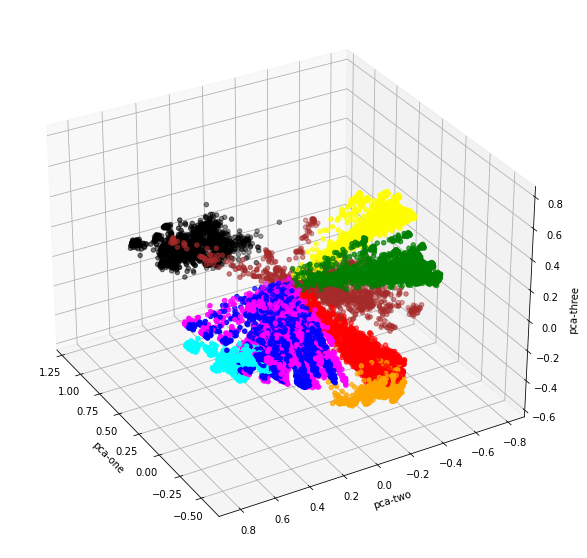

In [53]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
colormap=np.array(['green','brown','black','cyan','yellow','magenta','blue','red','orange'])
subs=b1.loc[rndperm,:]["substrate"]-1
#color=colormap[subs]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter=ax.scatter(
    xs=b1.loc[rndperm,:]["pca-one"], 
    ys=b1.loc[rndperm,:]["pca-two"], 
    zs=b1.loc[rndperm,:]["pca-three"], 
    c=colormap[subs]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.view_init(azim=150)
plt.show()

In [54]:
import plotly.express as px
fig=px.scatter_3d(b1, x="pca-one", y="pca-two", z="pca-three",color='substrate')
fig.show()

### t-SNE 2D visualization after  centering and normalization

In [55]:
import time

from sklearn.manifold import TSNE

n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(b1.iloc[rndperm[:n_sne],0:1701])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 3.651s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.166436
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.162796
[t-SNE] KL divergence after 300 iterations: 2.153207
t-SNE done! Time elapsed:

In [56]:
b_tsne = b1.iloc[rndperm[:n_sne],0:1706].copy()
b_tsne.head()

0         1         2         3         4         5         6  \
13909  0.078323  0.078644  0.044418  0.025442  0.029429  0.036457  0.042359   
16897  0.023756  0.024672  0.025552  0.026372  0.027247  0.027943  0.028516   
635   -0.028933  0.025456 -0.015674 -0.002242  0.000545  0.007144 -0.036883   
6268  -0.005271 -0.037440  0.006334  0.018541 -0.026442 -0.010635 -0.018599   
3563   0.045725  0.043157  0.013169 -0.006336 -0.001939  0.006984  0.015747   

              7         8         9  ...      1695      1696      1697  \
13909  0.051867  0.055037  0.060517  ... -0.032407 -0.024491 -0.024041   
16897  0.029017  0.029402  0.029708  ... -0.012024 -0.011810 -0.011591   
635   -0.013424 -0.001241  0.038496  ... -0.001688  0.002965  0.022722   
6268   0.006048  0.035610 -0.056136  ... -0.024138 -0.031324 -0.004182   
3563   0.022974  0.023271  0.029480  ... -0.022286 -0.018793 -0.014723   

           1698      1699      1700   pca-one   pca-two  pca-three  substrate  
13909 -0.017753 -0.018340 -0.017215 -0.296038 -0.277422  -0.407504          9  
16897 -0.011175 -0.009486 -0.009167 -0.390931  0.477132  -0.017673          7  
635    0.011978  0.035870 -0.031020  0.135089 -0.090115  -0.083221          8  
6268  -0.003535 -0.000990 -0.007607  0.430708 -0.019521   0.045528          2  
3563  -0.009060 -0.006109 -0.005496 -0.288751 -0.288297  -0.485958          9  

[5 rows x 1705 columns]

In [57]:
#df_tsne = b1.iloc[rndperm[:n_sne],0:1706].copy()
#df_tsne.head()
b_tsne['x-tsne'] = tsne_results[:,0]
b_tsne['y-tsne'] = tsne_results[:,1]
b_tsne['substrate']=ys
b_tsne.head()

0         1         2         3         4         5         6  \
13909  0.078323  0.078644  0.044418  0.025442  0.029429  0.036457  0.042359   
16897  0.023756  0.024672  0.025552  0.026372  0.027247  0.027943  0.028516   
635   -0.028933  0.025456 -0.015674 -0.002242  0.000545  0.007144 -0.036883   
6268  -0.005271 -0.037440  0.006334  0.018541 -0.026442 -0.010635 -0.018599   
3563   0.045725  0.043157  0.013169 -0.006336 -0.001939  0.006984  0.015747   

              7         8         9  ...      1697      1698      1699  \
13909  0.051867  0.055037  0.060517  ... -0.024041 -0.017753 -0.018340   
16897  0.029017  0.029402  0.029708  ... -0.011591 -0.011175 -0.009486   
635   -0.013424 -0.001241  0.038496  ...  0.022722  0.011978  0.035870   
6268   0.006048  0.035610 -0.056136  ... -0.004182 -0.003535 -0.000990   
3563   0.022974  0.023271  0.029480  ... -0.014723 -0.009060 -0.006109   

           1700   pca-one   pca-two  pca-three  substrate    x-tsne     y-tsne  
13909 -0.017215 -0.296038 -0.277422  -0.407504          9  0.359653  10.105051  
16897 -0.009167 -0.390931  0.477132  -0.017673          7 -4.041312  -3.386684  
635   -0.031020  0.135089 -0.090115  -0.083221          8  3.931115   5.173219  
6268  -0.007607  0.430708 -0.019521   0.045528          2 -9.535680  -3.826722  
3563  -0.005496 -0.288751 -0.288297  -0.485958          9 -4.780313   9.307057  

[5 rows x 1707 columns]

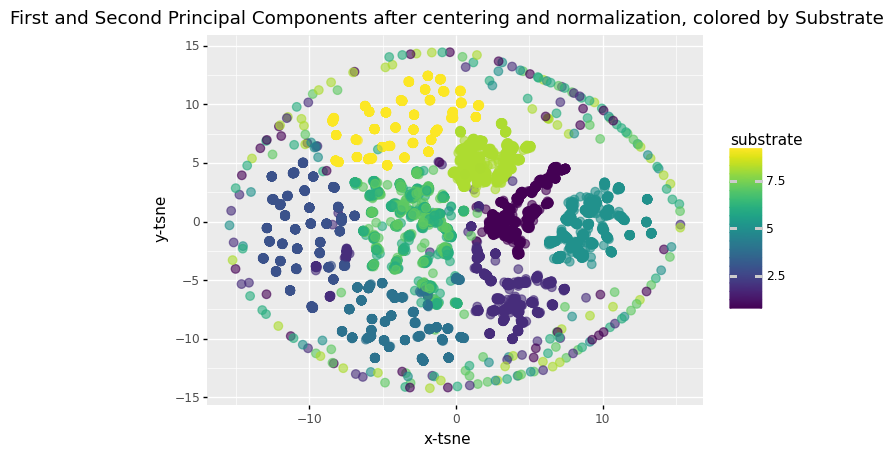

<ggplot: (140356908373)>

In [58]:
#b1['x-tsne'] = tsne_results[:,0]
#b1['y-tsne'] = tsne_results[:,1]
#df_tsne['z-tsne'] = tsne_results[:,2]
#df_tsne.head()
chart = ggplot(b_tsne, aes(x='x-tsne', y='y-tsne', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("First and Second Principal Components after centering and normalization, colored by Substrate")
chart

 ### t-SNE 2D visualization after  centering and normalization  using 100 PCs

In [40]:
pca_100 = PCA(n_components=100)
pca_result_100 = pca_100.fit_transform(b1.iloc[:,0:1701])
print('Cumulative explained variation for 100 principal components: {}'.format(np.sum(pca_100.explained_variance_ratio_)))

Cumulative explained variation for 100 principal components: 0.7480595299155606


In [41]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2,verbose=1, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_100[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 2.595s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.148568
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.666435
[t-SNE] KL divergence after 300 iterations: 1.934450
t-SNE done! Time elapsed:

In [42]:
df_tsne3= b1.iloc[rndperm[:n_sne],:].copy()
#df_tsne.head()

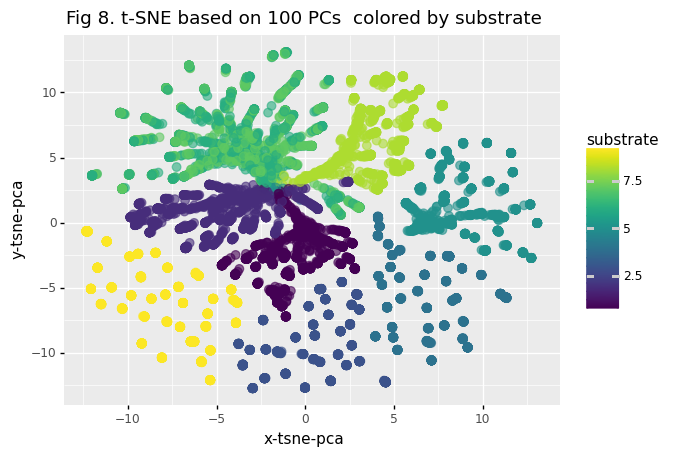

<ggplot: (140396703226)>

In [43]:
df_tsne3['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne3['y-tsne-pca'] = tsne_pca_results[:,1]
chart = ggplot( df_tsne3, aes(x='x-tsne-pca', y='y-tsne-pca', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("Fig 8. t-SNE based on 100 PCs  colored by substrate")
chart

 ### PCA 3D visualization after  centering and normalization

In [44]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=400)
tsne_pca_results = tsne.fit_transform(pca_result_100[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 2.698s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.148568
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.875748
[t-SNE] KL divergence after 400 iterations: 0.733223
t-SNE done! Time elapsed:

In [45]:
df_tsne4 = b1.iloc[rndperm[:n_sne],:].copy()
#df_tsne.head()

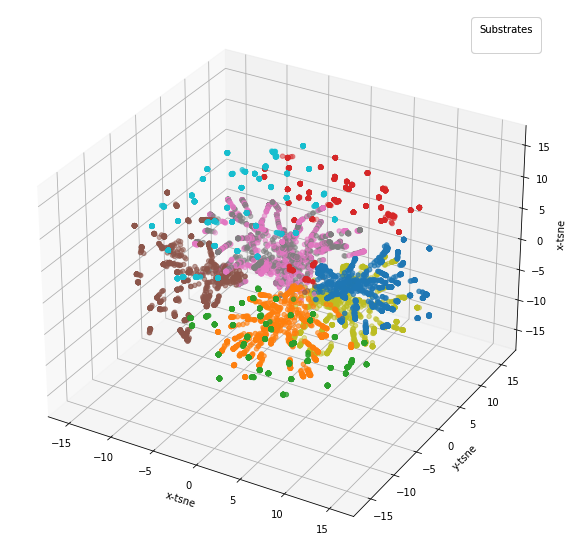

In [46]:
df_tsne4['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne4['y-tsne-pca'] = tsne_pca_results[:,1]
df_tsne4['z-tsne-pca'] = tsne_pca_results[:,2]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_tsne4["x-tsne-pca"], 
    ys=df_tsne4['y-tsne-pca'], 
    zs=df_tsne4["z-tsne-pca"], 
    c=df_tsne4["substrate"], 
    cmap='tab10'
)
ax.set_xlabel('x-tsne')
ax.set_ylabel('y-tsne')
ax.set_zlabel('x-tsne')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()